# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

In [ ]:
A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset 
A base contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens.

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


In [ ]:
1 - Quais são os gêneros de filmes mais assistidos?
2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?
3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [1]:
# importando as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Leitura do dataset
df = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')
filmes = df

In [ ]:
# Pré-visaulização do dataset
filmes.head(3)

In [ ]:
# tamanho da nossa base
print('Número de linhas e número de colunas:', filmes.shape)

In [ ]:
filmes.describe()

In [ ]:
filmes.dtypes

In [ ]:
# --------------------------- TRATAMENTO DE DADOS NULOS ---------------------

In [ ]:
filmes.isnull().sum()

In [ ]:
# PERCENTUAL DE ELEMENTOS NULOS
round(filmes.isnull().mean() * 100,2)

In [3]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
filmes.drop(['belongs_to_collection'],axis = 1, inplace = True)
filmes.drop(['homepage'],axis = 1, inplace = True)
filmes.drop(['poster_path'],axis = 1, inplace = True)     
filmes.drop(['tagline'],axis = 1, inplace = True)     

In [4]:
# REMOVE ELEMENTOS QUE POSSUEM DADOS NULOS
filmes = filmes.dropna()

In [5]:
# resetando os índices
filmes = filmes.reset_index()

In [ ]:
# validando se ainda há registros nulos
filmes.isnull().sum()

In [6]:
# tamanho da base após exclusão de features e registros nulos
print('Número de linhas e número de colunas:', filmes.shape)

Número de linhas e número de colunas: (44349, 21)


In [7]:
# TRANSFORMANDO A FEATURE "adult" EM BINÁRIO, ONDE 'True' = 1 e 'False' = 0
filmes["adulto_novo"] = filmes["adult"].apply(lambda x: 1 if x == "False" else 0)

In [ ]:
# VALIDANDO TRANSFORMAÇÃO da feature "adult"
filmes[["adulto_novo", "adult","original_title"]].head(3)

In [8]:
# -------------------- RENOMEANDO AS FEATURES --------------------------
# renomear as coluna e usar todas com caixa baixa para padronizar
filmes = filmes.rename(columns={'adult': "adulto", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

In [ ]:
# ------------- Transformar as features que são um dicionário em uma lista --------------

In [9]:
# feature genres
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['genero'] = filmes['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_genero'] = filmes['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente

In [13]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_genero", "genero", "titulo_original"]].head(3)

,novo_genero,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Fantasy, Family]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Romance, Comedy]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [228]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(filmes.novo_genero)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = filmes.novo_genero[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = filmes.novo_genero[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  20
['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']


In [14]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(filmes.novo_genero).transform(filmes.novo_genero)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [15]:
df_novo.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([filmes, df_novo], axis=1)

In [19]:
# copiando o conteúdo do novo dataframe para o filme utilizado
filmes = horizontal_stack.copy()

In [21]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
filmes.columns

Index(['index', 'adulto', 'despesas', 'genero', 'id', 'imdb_id',
       'lingua_original', 'titulo_original', 'descricao', 'popularidade',
       'cia_producao', 'pais_producao', 'data_lancamento', 'receita',
       'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos', 'adulto_novo', 'novo_genero', 'index',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [23]:
# Verificando o tamanho da base após a transformação da features de genero
print('Número de linhas e número de colunas:', filmes.shape)

Número de linhas e número de colunas: (44349, 44)


In [24]:
# Feature pais_producao
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['pais_producao'] = filmes['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_pais_producao'] = filmes['pais_producao'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente

In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_pais_producao", "pais_producao", "titulo_original"]].head(3)

In [25]:
# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(filmes.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = filmes.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = filmes.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print (pais_producao_unicos)

total de registros do dataset:  44349
pais_producao_unicos:  155
['United States of America', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'China', 'Australia', 'South Africa', 'Canada', 'Switzerland', 'Belgium', 'Japan', 'Iran', 'Netherlands', 'Hong Kong', 'Tunisia', 'Dominican Republic', 'Croatia', 'Russia', 'Macedonia', 'Austria', 'Ireland', 'Taiwan', 'New Zealand', 'Mexico', 'Poland', 'Peru', 'Cuba', 'Liechtenstein', 'Denmark', 'Finland', 'Sweden', 'Argentina', 'Iceland', 'South Korea', 'Serbia', 'India', 'Brazil', 'Greece', 'Congo', 'Senegal', 'Burkina Faso', 'Romania', 'Hungary', 'Philippines', 'Czech Republic', 'Vietnam', 'Trinidad and Tobago', 'Chile', 'Portugal', 'Norway', 'Kazakhstan', 'Georgia', 'Luxembourg', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Turkey', 'Ecuador', 'Lebanon', 'Morocco', 'Bosnia and Herzegovina', 'Bahamas', 'Malaysia', 'Bhutan', 'Bulgaria', 'Jamaica', 'Pakistan', 'Nepal', "Cote D'Ivoire", 'Thailand', 'Namibia', 'Cameroon', 'Colombia', 'Czech

In [26]:
# Feature idiomas_falados
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['idiomas_falados'] = filmes['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_idiomas_falados'] = filmes['idiomas_falados'].apply(get_list) 

In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)

In [236]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(filmes.novo_idiomas_falados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = filmes.novo_idiomas_falados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = filmes.novo_idiomas_falados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

total de registros do dataset:  44349
idiomas_falados_unicos:  73
['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin', 'Nederlands', '广州话 / 廣州話', '普通话', 'shqip', 'Italiano', '한국어/조선말', 'Magyar', 'فارسی', 'Dansk', '日本語', 'العربية', 'Hrvatski', 'Bosanski', '', 'Română', 'Bahasa indonesia', 'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski', 'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'বাংলা', 'Srpski', 'Wolof', 'Cymraeg', 'Latviešu', 'Kiswahili', 'ελληνικά', 'Türkçe', 'ภาษาไทย', 'suomi', 'Esperanto', 'български език', 'Український', 'ქართული', 'Bokmål', 'No Language', 'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego', 'Kinyarwanda', 'қазақ', 'پښتو', 'Eesti', 'Lietuvi\x9akai', 'Slovenščina', 'తెలుగు', 'euskera', 'Fulfulde', 'ozbek', 'Hausa']


In [233]:
# Feature cia_producao
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['cia_producao'] = filmes['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_cia_producao'] = filmes['cia_producao'].apply(get_list) 


In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

In [ ]:
# Criar uma lista que contenha somente valores únicos de cia, para idêntificá-los e contabilizá-los
todos_registros = len(filmes.novo_cia_producao)        
cia_unicos = [] # lista onde será incluídos os cia únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros):
    cia = filmes.novo_cia_producao[x]
    tam_cia = len(cia)
    i = z = b = 0
    while (i < tam_cia): 
        cada_cia_registo = filmes.novo_cia_producao[x][i]
        if (not cada_cia_registo in cia_unicos):      
            cia_unicos.append(cada_cia_registo) 
            z +=1
        i += 1        
    x += 1

print ("cia_unicos: ", len(cia_unicos))
#print (cia_unicos)

In [ ]:
# validando se ainda há registros nulos
filmes.isnull().sum()

In [ ]:
# ------------------- ALTERAÇÃO DO TIPOS DAS FEATURES ---------------

In [ ]:
filmes.dtypes

In [ ]:
filmes.dtypes

In [234]:
# converter variáveis object para categoricas
filmes.adulto = filmes.adulto.astype('category')
filmes.titulo_original = filmes.titulo_original.astype('category')
filmes.status = filmes.status.astype('category')
filmes.titulo = filmes.titulo.astype('category')

In [235]:
# converter variáveis objecto para float ou inteiro
filmes.popularidade = filmes.popularidade.astype('float64')
filmes.despesas = filmes.despesas.astype('float64')
filmes.receita = filmes.receita.astype('float64')
filmes.qtde_votos = filmes.qtde_votos.astype('int64')
filmes.id = filmes.id.astype('int64')

In [ ]:
filmes.dtypes

In [ ]:
# ------------------------ DESCRIÇÃO DAS FEATURES --------------------
# descrição das features
'adulto' - se o filme é para adulto ou não 
'despesas' - valor gasto na produção e divulgação dos vídeos
'genero' - qual é o gêncero do filme.
'id' - número que identifica o filme
'imdb_id' - número unico que identifica o filme na base do imdb
'lingua_original' - qual é o idioma original do filme. 
'titulo_original' - titulo original do filme
'descricao' - descrição do filme
'popularidade' - qual é a popularidade do filme
'cia_producao' - qual foi a companhia que produziu o filme. 
'pais_producao' - qual foi o país que produziu o filme.
'data_lancamento' - qual foi a data de lançamento do filme
'receita' -  qual foi a receita obtida com o filme
'duracao' - qual é a duração do filme em minutos
'idiomas_falados' - quais são os idiomas falados no filme. 
'status' - status do filmes. 
'slogan' - qual é o slogan do filme.
'titulo' - qual é o título do filme
'video' - se tem o video ou não do traile ????????? precisa desta feature ?????
'media_votos' - qual é a média de votos dada pelos usuários
'qtde_votos' - qual foi a quantidade de votos

# Tipos de features e seus possíveis valores
A) Variáveis categóricas - O dataset contém 8 variáveis:
1 - adulto - contém dois valores: 'false' = 1, 'true' = 0
2 - genero -  contém 29 valores possíveis: ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie'] 
3 - lingua_original -possui 90 valores possíveis: 'en' 'fr' 'zh' 'it' 'fa' 'nl' 'de' 'cn' 'ar' 'es' 'ru' 'sv' 'ja' 'ko'  'sr' 'bn' 'he' 'pt' 'wo' 'ro' 'hu' 'cy' 'vi' 'cs' 'da' 'no' 'nb' 'pl'
 'el' 'sh' 'xx' 'mk' 'bo' 'ca' 'fi' 'th' 'sk' 'bs' 'hi' 'tr' 'is' 'ps'
 'ab' 'eo' 'ka' 'mn' 'bm' 'zu' 'uk' 'af' 'la' 'et' 'ku' 'fy' 'lv' 'ta'
 'sl' 'tl' 'ur' 'rw' 'id' 'bg' 'mr' 'lt' 'kk' 'ms' 'sq' nan 'qu' 'te' 'am'
 'jv' 'tg' 'ml' 'hr' 'lo' 'ay' 'kn' 'eu' 'ne' 'pa' 'ky' 'gl' 'uz' 'sm'
 'mt' 'hy' 'iu' 'lb' 'si'
4 - cia_producao   - possui 19368 valores possíveis.
5 - pais_producao  - 155 valores possíveis.
6 - idiomas_falado - 73 valores possíveis.
7 - status - 'Released', nan, 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'          
8 - video - False, True, nan
9 - novo_genero 
10 - novo_pais_producao
11 - novo_idiomas_falados
12 - novo_cia_producao

B) Variáveis discretas - O dataset contém 13 variáveis: 
despesas, id, imdb_id, titulo_original, descricao,data_lancamento,popularidade,  
receita, duracao(minutos), slogan, titulo, media_votos, qtde_votos          

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
 # ---------------- HIPÓTESE - Quais são os 20 filmes mais populares?

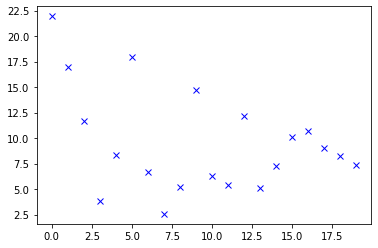

In [238]:
plt.plot(filmes.popularidade.head(20), "bx")

Text(0.5, 1.0, 'Gráfico de Popularidade x Título (Tentativa 1)')

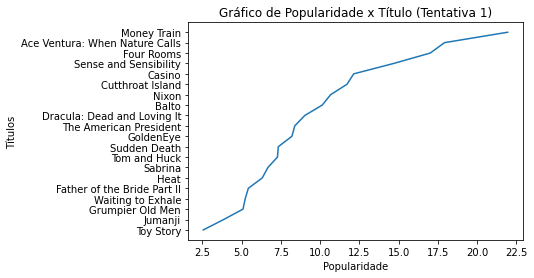

In [237]:
# Plotando o gráfico (Tentativa 1)
plt.plot(filmes.popularidade.head(20).sort_values(ascending=True), filmes.titulo_original.head(20))
plt.ylabel("Títulos")
plt.xlabel("Popularidade")
plt.title("Gráfico de Popularidade x Título (Tentativa 1)")

Text(0.5, 1.0, 'Gráfico de Popularidade x Título (Tentativa 2)')

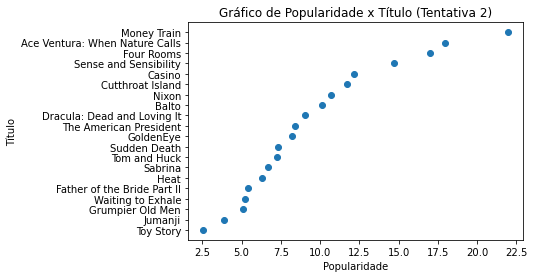

In [239]:
# Plotando o gráfico (Tentativa 2)
plt.scatter(filmes.popularidade.head(20).sort_values(ascending=True), filmes.titulo_original.head(20))
plt.ylabel("Título")
plt.xlabel("Popularidade")
plt.title("Gráfico de Popularidade x Título (Tentativa 2)")

In [ ]:
 # ---------------- HIPÓTESE - Quais são os gêneros de filmes mais assistidos?

In [ ]:
plt.plot(filmes.genero.head(20), "bx")

In [ ]:
 # ---------------- HIPÓTESE - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?

In [ ]:
 # ---------------- HIPÓTESE - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*